In [1]:
!CUDA_VISIBLE_DEVICES=4,5,6,7 torchrun --nproc_per_node=4 module/train4.py


*****************************************
Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
*****************************************
model.safetensors: 100%|█████████████████████| 178M/178M [00:05<00:00, 35.5MB/s]
Model saved to models/swin_tiny_patch4_window7_224.ms_in22k.pth
Model saved to models/swin_tiny_patch4_window7_224.ms_in22k.pth
Model saved to models/swin_tiny_patch4_window7_224.ms_in22k.pth
Model saved to models/swin_tiny_patch4_window7_224.ms_in22k.pth
Pretrained weights loaded successfully, ignoring mismatched keys.
Pretrained weights loaded successfully, ignoring mismatched keys.
Pretrained weights loaded successfully, ignoring mismatched keys.
Pretrained weights loaded successfully, ignoring mismatched keys.
Epoch 1/10: 100%|██████████████| 458/458 [15:08<00:00,  1.98s/batch, loss=0.851]
Validation Loss: 0.4885


In [2]:
!CUDA_VISIBLE_DEVICES=7 python module/evaluation.py

Evaluating on Validation Set
Model already exists at models/swin_tiny_patch4_window7_224.ms_in22k.pth
Pretrained weights loaded successfully, ignoring mismatched keys.
Current Allocated Memory: 0.27 GB
Max Allocated Memory: 0.41 GB
Current Reserved Memory: 0.51 GB
Max Reserved Memory: 0.51 GB
Evaluation Results on val set: MAE = 32.0794, RMSE = 73.7011

Evaluating on Test Set
Model already exists at models/swin_tiny_patch4_window7_224.ms_in22k.pth
Pretrained weights loaded successfully, ignoring mismatched keys.
Current Allocated Memory: 0.27 GB
Max Allocated Memory: 0.41 GB
Current Reserved Memory: 0.51 GB
Max Reserved Memory: 0.51 GB
Evaluation Results on test set: MAE = 32.5422, RMSE = 115.2307


In [3]:
!CUDA_VISIBLE_DEVICES=6 torchrun --nproc_per_node=1 module/evaluate2.py

Model already exists at models/swin_tiny_patch4_window7_224.ms_in22k.pth
Pretrained weights loaded successfully, ignoring mismatched keys.
Rank 0 - dataset size: 1286, batches: 161
Before all_reduce - Rank 0: ae = 41449.97265625, se = 7012864.0
After all_reduce - Rank 0: ae = 41449.97265625, se = 7012864.0
Val set: MAE = 32.1817, RMSE = 73.7887
Rank 0 - dataset size: 1190, batches: 149
Before all_reduce - Rank 0: ae = 38402.7265625, se = 15910703.0
After all_reduce - Rank 0: ae = 38402.7265625, se = 15910703.0
Test set: MAE = 32.2171, RMSE = 115.5331


In [ ]:
#LOCA modified

In [1]:
!CUDA_VISIBLE_DEVICES=6,7 torchrun --nproc_per_node=2 module2/train.py --model_name efficient1 --backbone resnet50 --swav_backbone --pre_norm

*****************************************
Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
*****************************************
0
1
Traceback (most recent call last):
  File "/home/renaldy_fredyan/PhDResearch/ELS/module2/train.py", line 242, in <module>
    train(args)
  File "/home/renaldy_fredyan/PhDResearch/ELS/module2/train.py", line 130, in train
    out, aux_out = model(img, bboxes)  # Forward pass
  File "/opt/miniconda/envs/Rey1/lib/python3.9/site-packages/torch/nn/modules/module.py", line 1110, in _call_impl
    return forward_call(*input, **kwargs)
  File "/opt/miniconda/envs/Rey1/lib/python3.9/site-packages/torch/nn/parallel/distributed.py", line 963, in forward
    output = self.module(*inputs[0], **kwargs[0])
  File "/opt/miniconda/envs/Rey1/lib/python3.9/site-packages/torch/nn/modules/module.py", line 1110, i

In [2]:
!CUDA_VISIBLE_DEVICES=6 torchrun --nproc_per_node=1 module2/evaluate.py --model_name efficient1 --backbone resnet50 --swav_backbone --pre_norm

Traceback (most recent call last):
  File "/home/renaldy_fredyan/PhDResearch/ELS/module2/evaluate.py", line 101, in <module>
    evaluate(args)
  File "/opt/miniconda/envs/Rey1/lib/python3.9/site-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "/home/renaldy_fredyan/PhDResearch/ELS/module2/evaluate.py", line 48, in evaluate
    model.load_state_dict(state_dict)
  File "/opt/miniconda/envs/Rey1/lib/python3.9/site-packages/torch/nn/modules/module.py", line 1497, in load_state_dict
    raise RuntimeError('Error(s) in loading state_dict for {}:\n\t{}'.format(
RuntimeError: Error(s) in loading state_dict for DistributedDataParallel:
	Missing key(s) in state_dict: "module.backbone.backbone.conv1.weight", "module.backbone.backbone.bn1.weight", "module.backbone.backbone.bn1.bias", "module.backbone.backbone.bn1.running_mean", "module.backbone.backbone.bn1.running_var", "module.backbone.backbone.layer1.0.conv1.weight", "module.backbone.

In [ ]:
# Paper i-ELF

In [4]:
!CUDA_VISIBLE_DEVICES=4,5,6,7 torchrun --nproc_per_node=4 module2/train.py --model_name efficient5 --backbone swinT1k --swav_backbone --pre_norm

W0206 18:30:44.920000 955123 site-packages/torch/distributed/run.py:793] 
W0206 18:30:44.920000 955123 site-packages/torch/distributed/run.py:793] *****************************************
W0206 18:30:44.920000 955123 site-packages/torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W0206 18:30:44.920000 955123 site-packages/torch/distributed/run.py:793] *****************************************
Model already exists at models/swin_tiny_patch4_window7_224.ms_in22k.pth
Model already exists at models/swin_tiny_patch4_window7_224.ms_in22k.pth
Model already exists at models/swin_tiny_patch4_window7_224.ms_in22k.pthModel already exists at models/swin_tiny_patch4_window7_224.ms_in22k.pth

/home/renaldy_fredyan/PhDResearch/ELS/module2/architecture/swin_transformer_encoder.py:50: FutureWarning: You are using `

In [6]:
!CUDA_VISIBLE_DEVICES=6 torchrun --nproc_per_node=1 module2/evaluate.py --model_name efficient5 --backbone swinT1k --swav_backbone --pre_norm

Loading saved model from pretrained_models/swin_tiny_patch4_window7_224.pth
/home/renaldy_fredyan/PhDResearch/ELS/module2/evaluate.py:36: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental 

In [ ]:
# new ielf

In [2]:
!CUDA_VISIBLE_DEVICES=4,5,6,7 torchrun --nproc_per_node=4 module3/train.py --model_name efficient12 --backbone swinB22K --swav_backbone --pre_norm

W0207 16:51:54.959000 1163169 site-packages/torch/distributed/run.py:793] 
W0207 16:51:54.959000 1163169 site-packages/torch/distributed/run.py:793] *****************************************
W0207 16:51:54.959000 1163169 site-packages/torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W0207 16:51:54.959000 1163169 site-packages/torch/distributed/run.py:793] *****************************************
Model already exists at models/swin_base_patch4_window7_224_22k.pth
Model already exists at models/swin_base_patch4_window7_224_22k.pth
Model already exists at models/swin_base_patch4_window7_224_22k.pth
Model already exists at models/swin_base_patch4_window7_224_22k.pth
Model already exists at models/swin_base_patch4_window7_224_22k.pth
Model already exists at models/swin_base_patch4_window7_224_22k.pth
M

In [8]:
!CUDA_VISIBLE_DEVICES=6 torchrun --nproc_per_node=1 module3/evaluate.py --model_name efficient12 --backbone swinB22K --swav_backbone --pre_norm

Model already exists at models/swin_base_patch4_window7_224_22k.pth
Model already exists at models/swin_base_patch4_window7_224_22k.pth
/home/renaldy_fredyan/PhDResearch/ELS/module3/architecture/feature_extraction.py:103: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the load

In [35]:
!CUDA_VISIBLE_DEVICES=3 python module/evaluate2.py

Model already exists at models/swin_base_patch4_window7_224.ms_in22k.pth
/home/renaldy_fredyan/PhDResearch/ELS/module/swin_transformer_encoder.py:50: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this e


5 Best MAE:
Train MAE:
Epoch     MAE            
-------------------------
67        8.6164         
69        9.0160         
68        9.1001         
70        9.3618         
99        9.5681         

Validation MAE:
Epoch     MAE            
-------------------------
81        7.3309         
95        7.6426         
93        7.6468         
82        8.0018         
80        8.0856         


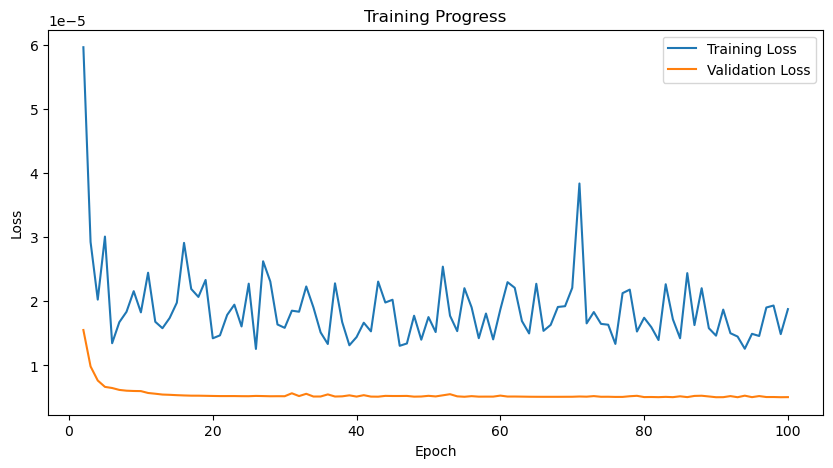

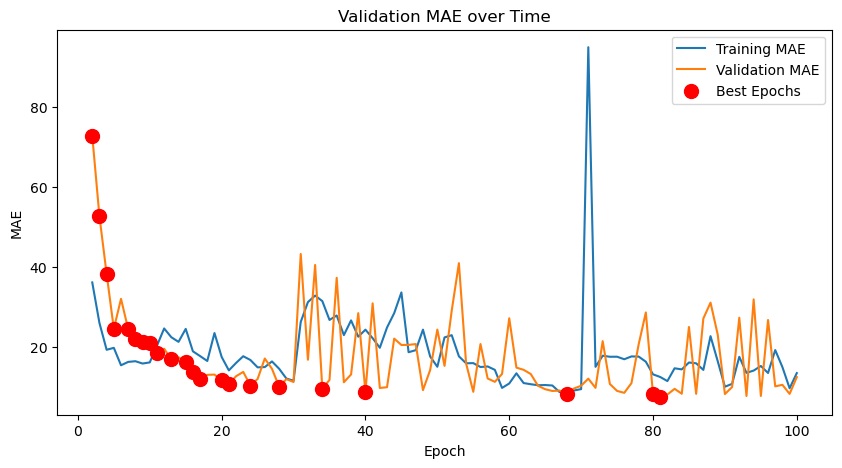

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca CSV
df = pd.read_csv('checkpoints/training_log.csv')

# Eksklusi epoch pertama
df = df[df['Epoch'] > 1]

best_train = df.nsmallest(5, 'Train MAE')[['Epoch', 'Train MAE']]
best_val = df.nsmallest(5, 'Val MAE')[['Epoch', 'Val MAE']]

# Print tabel
print("\n5 Best MAE:")
print("=" * 50)
print("Train MAE:")
print(f"{'Epoch':<10}{'MAE':<15}")
print("-" * 25)
for _, row in best_train.iterrows():
    print(f"{int(row['Epoch']):<10}{row['Train MAE']:<15.4f}")

print("\nValidation MAE:")
print(f"{'Epoch':<10}{'MAE':<15}")
print("-" * 25)
for _, row in best_val.iterrows():
    print(f"{int(row['Epoch']):<10}{row['Val MAE']:<15.4f}")
print("=" * 50)

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(df['Epoch'], df['Train Loss'], label='Training Loss')
plt.plot(df['Epoch'], df['Val Loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Progress')
plt.show()

# Plot MAE dengan best points
plt.figure(figsize=(10, 5))
plt.plot(df['Epoch'], df['Train MAE'], label='Training MAE')
plt.plot(df['Epoch'], df['Val MAE'], label='Validation MAE')

# Tambahkan titik merah untuk Best Epochs
best_epochs = df[df['Best'] == 'Yes']
plt.scatter(best_epochs['Epoch'], best_epochs['Val MAE'], 
           color='red', s=100, label='Best Epochs', zorder=5)

plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Validation MAE over Time')
plt.show()


In [5]:
!CUDA_VISIBLE_DEVICES=3 torchrun --nproc_per_node=1 --master_port=29501 module/evaluate4.py

Model already exists at models/swin_base_patch4_window7_224.ms_in22k.pth
/home/renaldy_fredyan/PhDResearch/ELS/module/swin_transformer_encoder.py:50: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this e